In [6]:
#imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from random import shuffle
import matplotlib.pyplot as plt
import random
random.seed(123)

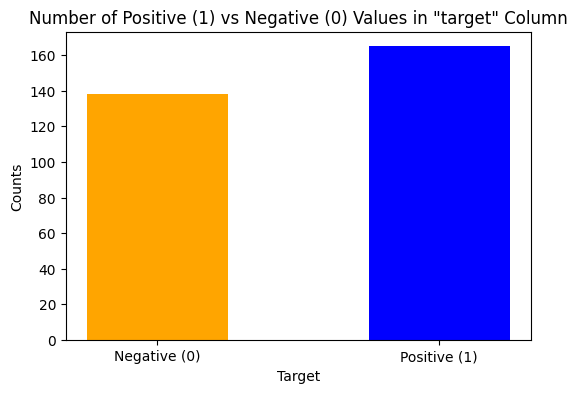

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
<bound method DataFrame.info of      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   

In [2]:
#2.1 Preprocess the raw data
df = pd.read_csv('heart.csv')

Heart = df.values[:, 1:-1]

# Extracting only the "target" column
target_column = df['target']

# Counting positive (1) and negative (0) values
positive_count = (target_column == 1).sum()
negative_count = (target_column == 0).sum()

# Creating a bar plot
plt.figure(figsize=(6, 4))

# Bar positions and heights
positions = [0, 1]
heights = [negative_count, positive_count]

# Bar labels
labels = ['Negative (0)', 'Positive (1)']

plt.bar(positions, heights, tick_label=labels, color=['orange', 'blue'], width = 0.5)
plt.xlabel('Target')
plt.ylabel('Counts')
plt.title('Number of Positive (1) vs Negative (0) Values in "target" Column')

plt.show()


print(df.isnull().sum())
print(df.info)



#Data is all numerical and there are no missing values

In [3]:
#2.2 Split the data into two subsets and normalize the features of samples
heart_fea = df.drop('target', axis=1).values
target = df['target'].values


X_train_val, X_test, y_train_val, y_test = train_test_split(heart_fea, target, 
                                                            test_size=0.14, 
                                                            random_state=0)
print("train_val: {}, test: {}".format(X_train_val.shape[0], X_test.shape[0]))

normalizer = StandardScaler()
X_train_val = normalizer.fit_transform(X_train_val)
X_test = normalizer.transform(X_test)

train_val: 260, test: 43


In [4]:
#2.3 Train the logistic regression model and select the hyperparameter with cross-validation
# here we use 10-fold cross-validation
folds = 10

# get the number of samples in the training and validation set
num_train_val = X_train_val.shape[0] 

# shuffle the index of samples in the train_val set
index_of_samples = np.arange(num_train_val) 
shuffle(index_of_samples)

# split the index of the train_valid set into 10 folds
index_of_folds = index_of_samples.reshape(folds, -1)
print(index_of_folds)

# potential hyperparameters. 
#These hyperparameters are just used for illustration. 
#You should try more hyperparameters to get a good model.
#The hyperparameters must be nonnegative!
regularization_coefficient = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 20.0, 50.0, 100.0]

best_acc = 0.0
best_reg = 0.0

for reg in regularization_coefficient:
    
    # 10-fold cross-validation
    sum_acc = 0.0
    for fold in range(folds):
        
        index_of_folds_temp = index_of_folds.copy()
        
        valid_index = index_of_folds_temp[fold,:].reshape(-1) #get the index of the validation set
        train_index = np.delete(index_of_folds_temp, fold, 0).reshape(-1) #get the index of the training set
        
        # training set
        X_train = X_train_val[train_index]
        y_train = y_train_val[train_index]
        
        # validation set
        X_valid = X_train_val[valid_index]
        y_valid = y_train_val[valid_index]
                
        # build the model with different hyperparameters
        clf = LogisticRegression(penalty='l2', C=reg, solver='lbfgs')
        
        #train the model with the training set
        clf.fit(X_train, y_train)
        
        y_valid_pred = clf.predict(X_valid)
        acc = accuracy_score(y_valid, y_valid_pred)
        
        sum_acc += acc
    
    cur_acc = sum_acc / folds
    
    print("reg_coeff: {}, acc: {:.3f}".format(1/reg, cur_acc))
    
    # store the best hyperparameter
    if cur_acc > best_acc:
        best_acc = cur_acc
        best_reg = reg

[[ 63 221  54 104 121  98 149 205  31  29 190 243  25 180 142  38 173  94
  148 186 159  24 204  64  75 201]
 [ 12 160 109  61 242 102 129  72 233  56 217  14 219 239   6  57  70 158
   35 216 140 181 106  92 117 112]
 [ 50 127  19 236 153 164 177 105  76 213  28 178 138 200 226  84 119  77
  176 151  83 172 154  16  89  82]
 [ 37 210 197 115 135  66   7 206 256  30 183  47 167 188  91 125 174  20
  249 212 108 257  53  42  71 169]
 [162  60  33 235 157  51  81  88 192 207 161  68 194 225 222  55  10 147
  132 145 184 237  79 254 234 182]
 [191  69 156  65 253  49 166 241   2 220 118 227 113 189  39  45 215 139
   59 126  73  15 128 255 103  58]
 [ 90 195  93 252 150  48   4 251 211  99 116  18 100 141 240 238  43 209
  168 185  21  46 193   8 130  95]
 [107 171 203 124 228 244 199 248 175 232 131 165 101   3 229 144 134 163
  155  52 123 133 245  78 196 250]
 [120  67 122 146 110  74   5 202  32  36 170  23  11 259 114 187  80   1
   17  96 152 224  22 198 111 231]
 [  0  41  62 179 2

accuracy: 0.791, recall: 0.905, precision: 0.731, f1: 0.809,




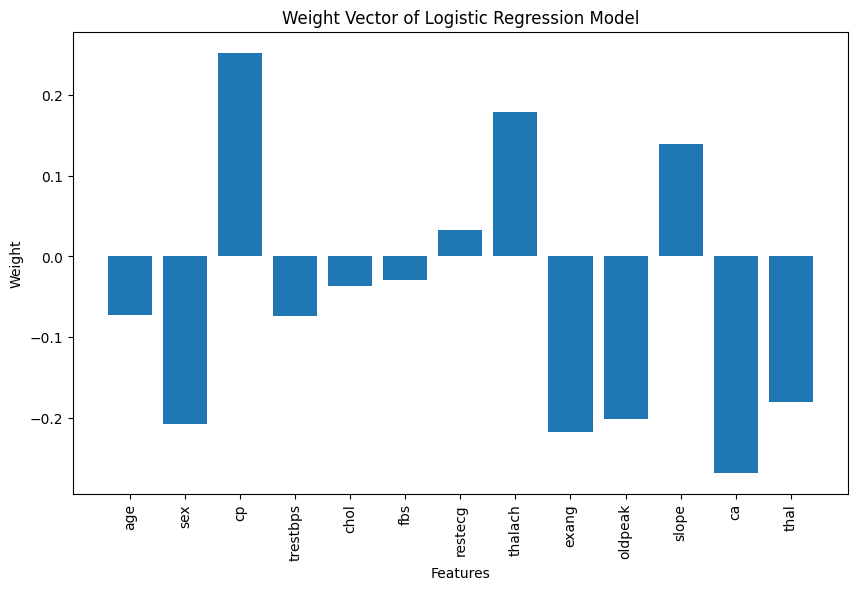

In [5]:
#2.4 
# retrain the model
clf = LogisticRegression(penalty='l2', C=best_reg, solver='lbfgs')
clf.fit(X_train_val, y_train_val)

# evaluate the model on the testing set
y_test_pred = clf.predict(X_test)


acc = accuracy_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)


print("accuracy: {:.3f}, recall: {:.3f}, precision: {:.3f}, f1: {:.3f},".format(acc, recall, precision, f1))
print("\n")
w = clf.coef_[0]

# Get the feature names if available (optional)
feature_names = df.columns[:-1]

# Plotting the weight vector
plt.figure(figsize=(10, 6))
plt.bar(range(len(w)), w, tick_label=feature_names)
plt.xlabel('Features')
plt.ylabel('Weight')
plt.title('Weight Vector of Logistic Regression Model')
plt.xticks(rotation=90)
plt.show()

#The reasoning for some weight being larger than others, is due to the fact that certain features have more importance in determining the target outcome than others.